# Handwritten Digit Recognition using CNN (MNIST)

## Introduction
This notebook demonstrates an end-to-end deep learning workflow for handwritten digit classification using the **MNIST dataset** and a **Convolutional Neural Network (CNN)** implemented with **TensorFlow / Keras**.  
The notebook covers data loading, exploration, preprocessing, model design, training with data augmentation, evaluation, and error analysis.


## Import Libraries
In this cell, we import all the required Python libraries.  
- NumPy and Pandas are used for numerical computations  
- Matplotlib and Seaborn are used for data visualization  
- TensorFlow and Keras are used for building and training the CNN model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

2026-01-27 12:33:56.261425: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1769517236.691901      55 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1769517236.820086      55 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1769517237.980631      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769517237.980672      55 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1769517237.980674      55 computation_placer.cc:177] computation placer alr

## Load Dataset
The MNIST dataset is a collection of 28×28 grayscale images of handwritten digits ranging from 0 to 9.  
It is split into training and testing sets.
## Load MNIST Dataset
The MNIST dataset is loaded directly from Keras.  
- `x_train` and `x_test` contain image data  
- `y_train` and `y_test` contain the corresponding digit labels

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model


(x_train, y_train), (x_test, y_test) = mnist.load_data()



11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


## Dataset Inspection
This step verifies:
- The shape of training and test datasets  
- The data types of images and labels  

This ensures the dataset is correctly loaded.

In [3]:
# Check data types
print(f"x_train data type: {type(x_train)}")
print(f"y_train data type: {type(y_train)}")
print(f"x_test data type: {type(x_test)}")
print(f"y_test data type: {type(y_test)}\n")

# Check shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}\n")

# Check unique values in target variables
print(f"Unique values in y_train: {np.unique(y_train)}")
print(f"Unique values in y_test: {np.unique(y_test)}\n")

# Check if there is any missing data
print(f"Any missing values in x_train: {np.any(np.isnan(x_train))}")
print(f"Any missing values in y_train: {np.any(np.isnan(y_train))}")
print(f"Any missing values in x_test: {np.any(np.isnan(x_test))}")
print(f"Any missing values in y_test: {np.any(np.isnan(y_test))}")

x_train data type: <class 'numpy.ndarray'>
y_train data type: <class 'numpy.ndarray'>
x_test data type: <class 'numpy.ndarray'>
y_test data type: <class 'numpy.ndarray'>

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)

Unique values in y_train: [0 1 2 3 4 5 6 7 8 9]
Unique values in y_test: [0 1 2 3 4 5 6 7 8 9]

Any missing values in x_train: False
Any missing values in y_train: False
Any missing values in x_test: False
Any missing values in y_test: False


## Number of Classes
The number of unique labels in the dataset is calculated to confirm that there are **10 classes**, representing digits from 0 to 9.


In [4]:
num_labels = len(np.unique(y_train))
num_labels


10

## Label Distribution
This section visualizes the frequency of each digit in the training dataset.  
A balanced distribution helps ensure fair model training.

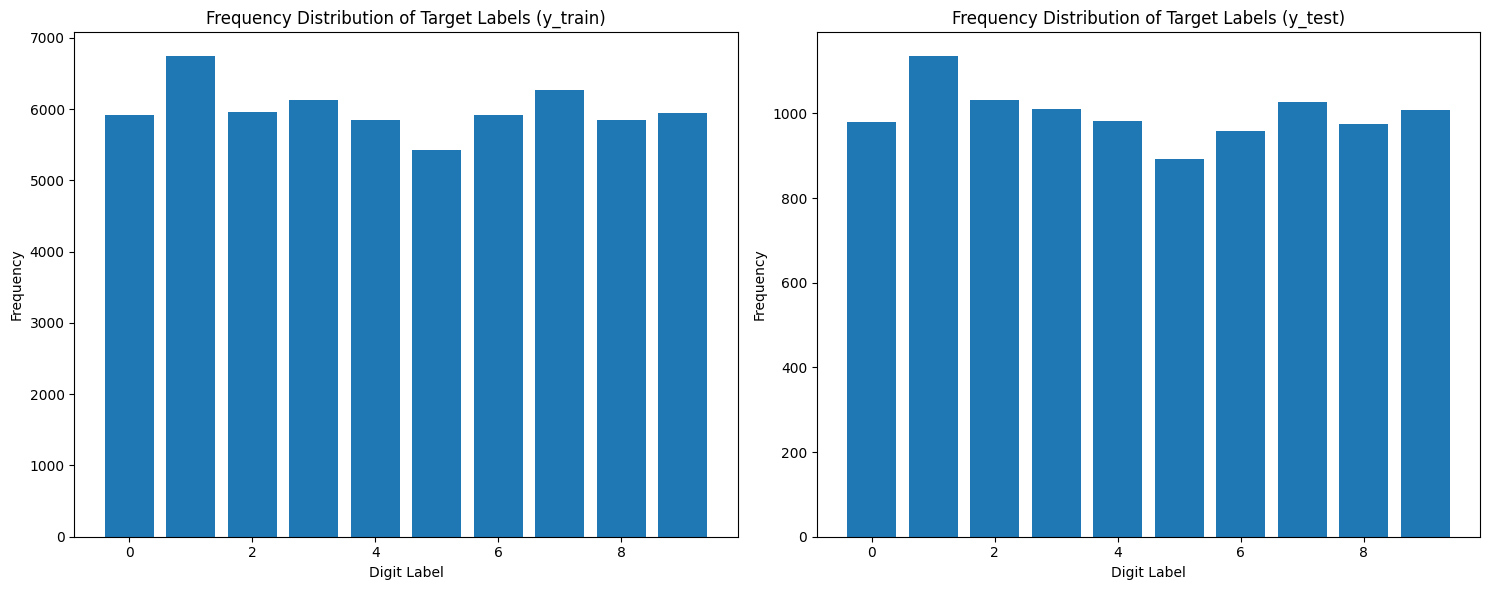

In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# y_train
values_train, counts_train = np.unique(y_train, return_counts=True)
axes[0].bar(values_train, counts_train)
axes[0].set_title('Frequency Distribution of Target Labels (y_train)')
axes[0].set_xlabel('Digit Label')
axes[0].set_ylabel('Frequency')

# y_test
values_test, counts_test = np.unique(y_test, return_counts=True)
axes[1].bar(values_test, counts_test)
axes[1].set_title('Frequency Distribution of Target Labels (y_test)')
axes[1].set_xlabel('Digit Label')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


## Sample Image Visualization
A grid of handwritten digit images is displayed to visually inspect the dataset and understand the variation in writing styles.


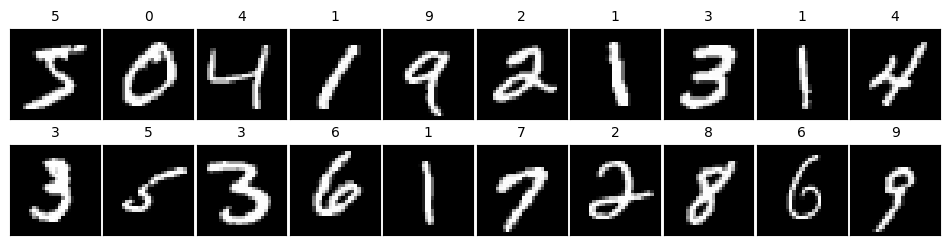

In [6]:
def visualize_images(data):
    fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(12,3),
                             gridspec_kw={'wspace':0.04, 'hspace':0.01}, 
                             squeeze=True)
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(x_train[i], cmap='gray')
        ax.set_xticks([]), ax.set_yticks([])
        ax.set_title(str(y_train[i]), fontsize=10)
        
    plt.tight_layout()
    plt.show()

visualize_images(x_train)

## Raw Label Inspection
The first few labels from the training dataset are displayed to confirm that labels are stored as integer values before encoding.


In [7]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

## One-Hot Encoding
The digit labels are converted into one-hot encoded vectors.  
This format is required for multi-class classification using a softmax output layer.


In [8]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Verify Encoded Labels
A sample of encoded labels is displayed to confirm correct transformation.


In [9]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

## Reshape Input Data
Images are reshaped to include a channel dimension `(28, 28, 1)` so they are compatible with convolutional layers.


In [10]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


## Normalize Pixel Values
Pixel values are scaled from `[0, 255]` to `[0, 1]`.  
Normalization improves training stability and speeds up convergence.


In [11]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255


## Build CNN Model
A Convolutional Neural Network is constructed using:
- Convolutional layers for feature extraction  
- Max pooling layers for spatial reduction  
- Batch normalization for training stability  
- Dropout layers to prevent overfitting  
- Fully connected layers for classification  

The final layer uses **softmax activation**.

In [12]:
model = Sequential()

model.add(Conv2D(32,(3,3),padding = "same" , activation="relu",input_shape=x_train.shape[1:]))
model.add(Conv2D(32, (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_labels, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), "accuracy"])

I0000 00:00:1769517258.184410      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1769517258.188272      55 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


## Model Summary
This section displays a summary of the CNN architecture, including:
- Layer types  
- Output shapes  
- Number of trainable parameters

In [13]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 892,266 (3.40 MB)

 Trainable params: 891,050 (3.40 MB)

 Non-trainable params: 1,216 (4.75 KB)

## Data Augmentation
Data augmentation is applied using random transformations such as:
- Rotation  
- Shifting  
- Zooming  

This helps improve model generalization.


In [14]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)
datagen.fit(x_train)

## Model Training
The CNN model is trained using augmented data.  
Validation data is used to monitor performance and detect overfitting during training.


In [15]:
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
history = model.fit(datagen.flow(x_train, y_train, batch_size=512), epochs=50, 
                    validation_data=(x_test, y_test), callbacks=[early_stopping])

Epoch 1/50


I0000 00:00:1769517264.167400     123 service.cc:152] XLA service 0x7f8f7c007a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1769517264.167463     123 service.cc:160]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1769517264.167470     123 service.cc:160]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1769517264.901186     123 cuda_dnn.cc:529] Loaded cuDNN version 91002


  1/118 ━━━━━━━━━━━━━━━━━━━━ 24:17 12s/step - accuracy: 0.1035 - loss: 3.8997 - precision: 0.1229 - recall: 0.0566

I0000 00:00:1769517273.264248     123 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


118/118 ━━━━━━━━━━━━━━━━━━━━ 36s 199ms/step - accuracy: 0.5662 - loss: 1.5270 - precision: 0.6475 - recall: 0.5059 - val_accuracy: 0.1135 - val_loss: 4.4484 - val_precision: 0.1135 - val_recall: 0.1135
Epoch 2/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.8991 - loss: 0.3223 - precision: 0.9208 - recall: 0.8820 - val_accuracy: 0.1135 - val_loss: 6.7821 - val_precision: 0.1135 - val_recall: 0.1135
Epoch 3/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.9405 - loss: 0.1938 - precision: 0.9517 - recall: 0.9302 - val_accuracy: 0.1445 - val_loss: 5.1269 - val_precision: 0.1449 - val_recall: 0.1437
Epoch 4/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.9526 - loss: 0.1535 - precision: 0.9614 - recall: 0.9456 - val_accuracy: 0.6080 - val_loss: 1.3557 - val_precision: 0.6337 - val_recall: 0.5642
Epoch 5/50
118/118 ━━━━━━━━━━━━━━━━━━━━ 16s 139ms/step - accuracy: 0.9588 - loss: 0.1307 - precision: 0.9654 - recall: 0.9530 - val_accuracy: 0.9588 - val_loss

In [16]:
y_pred = model.predict(x_test)
y_pred_class = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


## Classification Report
A detailed classification report is generated, showing:
- Precision  
- Recall  
- F1-score  
- Support for each digit class

In [17]:
class_labels = ['0','1','2','3','4','5','6','7','8','9']
report = classification_report(y_true, y_pred_class, target_names=class_labels)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       1.00      1.00      1.00      1010
           4       0.99      1.00      0.99       982
           5       1.00      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      1.00      0.99      1028
           8       1.00      0.99      1.00       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



## Training vs Validation Accuracy
Accuracy curves for training and validation sets are plotted across epochs to evaluate model performance and overfitting behavior.


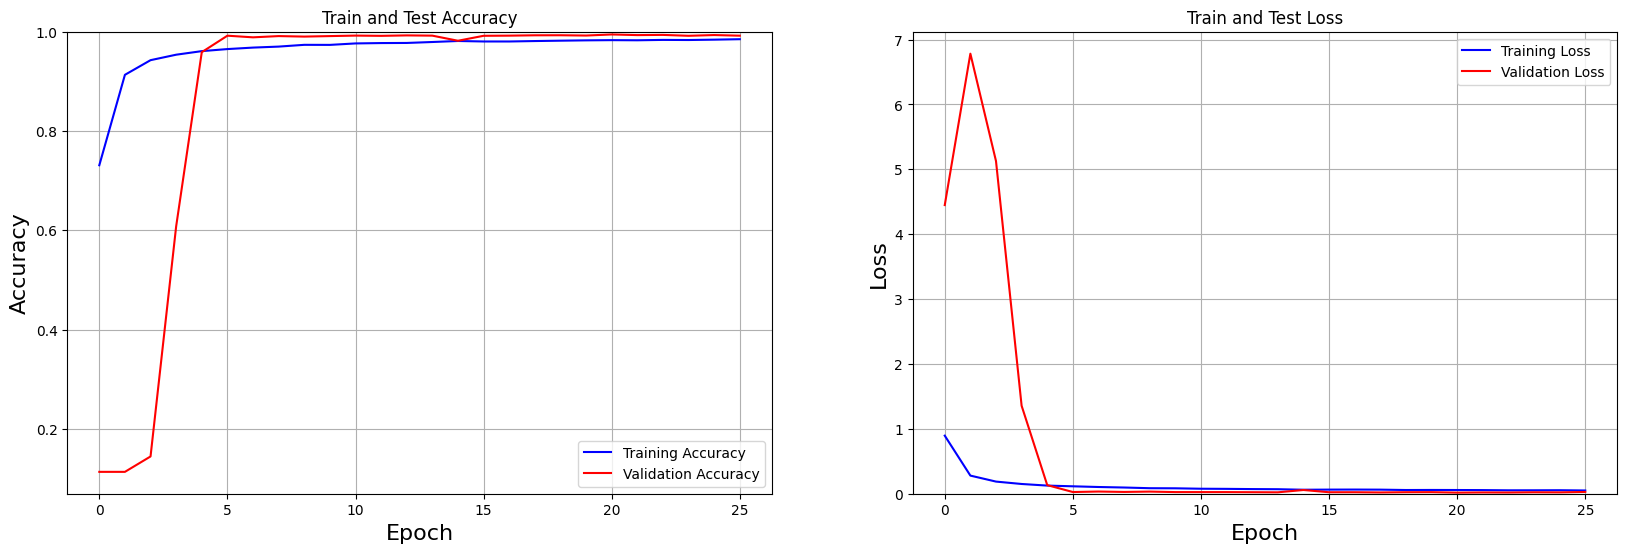

In [18]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], color='b', label='Training Accuracy')
plt.plot(history.history['val_accuracy'], color='r', label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.ylim([min(plt.ylim()),1])
plt.title('Train and Test Accuracy')
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], color='b', label='Training Loss')
plt.plot(history.history['val_loss'], color='r', label='Validation Loss')
plt.legend()
plt.xlabel('Epoch', fontsize=16)
plt.ylabel('Loss', fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title('Train and Test Loss')
plt.grid(True)
plt.show()

## Model Evaluation
The trained model is evaluated on the test dataset to compute overall performance metrics such as accuracy and loss.


In [19]:
loss, precision, recall, acc=model.evaluate(x_test, y_test, verbose=False)
print('Test Accuracy: ', acc)
print('Test Loss: ', loss)
print('Test Precision: ', precision)
print('Test Recall: ', recall)

Test Accuracy:  0.9944999814033508
Test Loss:  0.0167362242937088
Test Precision:  0.9947958588600159
Test Recall:  0.9940000176429749


## Save Model
The trained CNN model is saved to disk for future use or deployment.


In [20]:
model.save('mnist_model_saved.h5')

## Random Test Sample Selection
A random image from the test dataset is selected to demonstrate single-image prediction.


In [21]:
import random
random = random.randint(0, x_test.shape[0])
random

8619

## Extract Test Image
The selected image and its true label are extracted for visualization and comparison.


In [22]:
test_image = x_test[random]
y_test[random]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Display Test Image
The chosen handwritten digit image is displayed in grayscale.


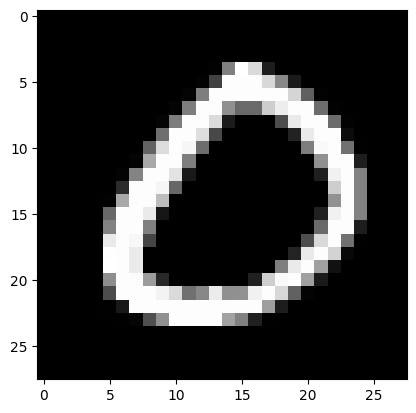

In [23]:
plt.imshow(test_image.reshape(28,28), cmap='gray');

## Single Image Prediction
The model predicts the digit class of the selected image, and the predicted value is displayed.


In [24]:
test_data = x_test[random].reshape(1,28,28,1)
probability = model.predict(test_data)
probability

print ('-'*50)

predicted_classes = np.argmax(probability)
predicted_classes

print ('-'*50)

print(f'Predicted class: {predicted_classes}')
print(f'Predicted class probability value: {(np.argmax(probability, axis=-1))[0]}')
print(f'Probability values of other classes: \n{probability}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step
--------------------------------------------------
--------------------------------------------------
Predicted class: 0
Predicted class probability value: 0
Probability values of other classes: 
[[1.0000000e+00 5.0208748e-10 3.9175514e-08 4.3381865e-12 3.3512076e-10
  4.7819301e-11 9.8768229e-09 1.1680410e-09 2.0979962e-10 2.5145122e-08]]


## Misclassified Samples
Several incorrectly classified test images are visualized to analyze model weaknesses.


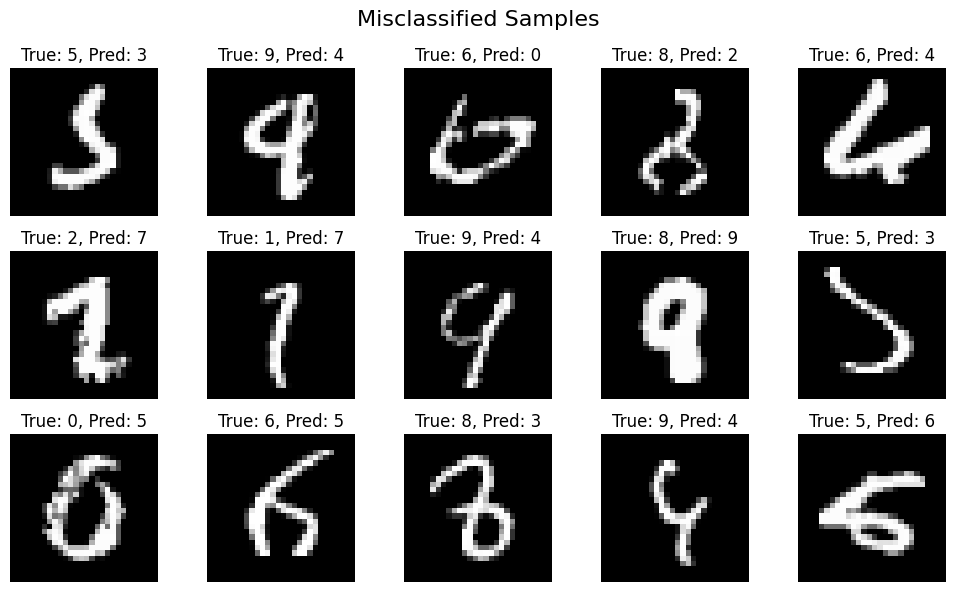

In [25]:
y_test_labels = np.argmax(y_test, axis=1)

misclassified_idx = np.where(y_pred_class != y_test_labels)[0]

fig, axes = plt.subplots(3, 5, figsize=(10, 6))
fig.suptitle("Misclassified Samples", fontsize=16)

for i, ax in enumerate(axes.flat):
    idx = misclassified_idx[i]
    ax.imshow(x_test[idx].reshape(28, 28), cmap="gray")
    ax.set_title(f"True: {y_test_labels[idx]}, Pred: {y_pred_class[idx]}")
    ax.axis("off")

plt.tight_layout()
plt.show()

## Per-Class Accuracy
Accuracy is calculated separately for each digit class to evaluate class-wise performance.


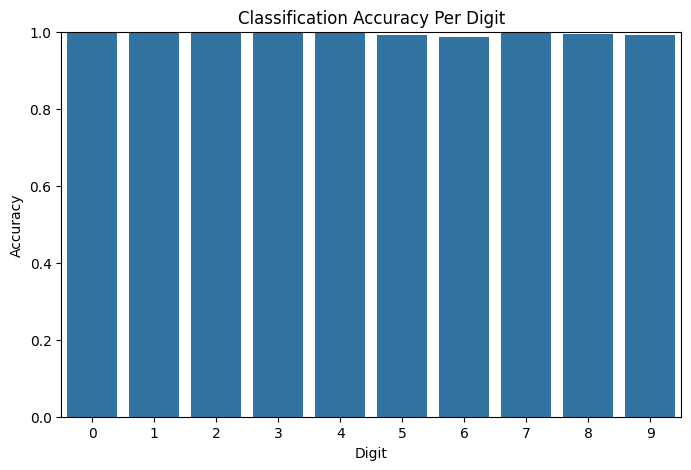

In [26]:
num_classes = 10
class_accuracies = []

for i in range(num_classes):
    correct = np.sum((y_test_labels == i) & (y_pred_class == i))
    total = np.sum(y_test_labels == i)
    accuracy = correct / total if total > 0 else 0
    class_accuracies.append(accuracy)

df = pd.DataFrame({"Digit": range(10), "Accuracy": class_accuracies})

plt.figure(figsize=(8, 5))
sns.barplot(x="Digit", y="Accuracy", data=df)
plt.ylim(0, 1)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy Per Digit")
plt.show()

## Confusion Matrix
A confusion matrix is plotted to visualize how frequently each digit is confused with others.


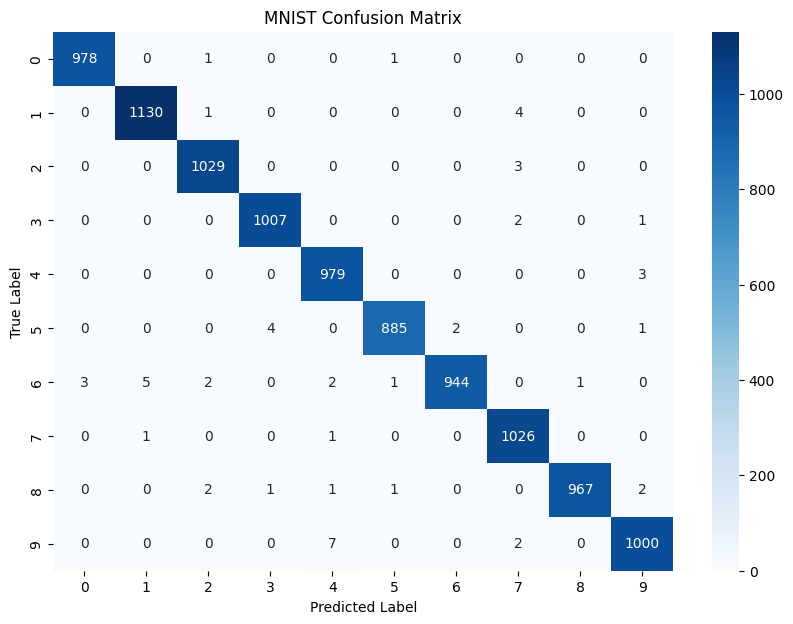

In [27]:
y_pred_labels = y_pred_class
conf_matrix = confusion_matrix(y_test_labels, y_pred_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("MNIST Confusion Matrix")
plt.show()


## Conclusion
This notebook presents a complete CNN-based approach to handwritten digit recognition using the MNIST dataset.  
Through preprocessing, data augmentation, and a carefully designed convolutional architecture, the model achieves strong classification performance.  
Error analysis using misclassified samples and a confusion matrix provides insight into areas for improvement and future enhancements.